# Regression #
### Disclaimer: ###
This notebook uses the code given in clinic 2 as reference to build and train the regression model.

In [42]:
# Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model as lm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

In [63]:
# Open data frame
df = pd.read_csv('data_clean.csv')

# In case you want to take a look at all available columns
# for col in df.columns:
#    print(col)

In [64]:
def get_rmse(actual, predicted):
    error = np.sqrt(np.sum((actual - predicted)**2) / len(actual))
    return error

In [65]:
# Build regression model

starting_index = df.columns.get_loc('Apache_Spark')  # This is the first df column where the skills are starting

reg_columns = ['salary']
reg_columns += df.iloc[:, starting_index:].columns.tolist()

# Select relevant columns
reg_df = df.reindex(columns=reg_columns)

# Remove entries with no salary info
reg_df = reg_df[reg_df['salary'] != "Not available"]

# Split data into x and y for the regression model
X = reg_df.drop(['salary'], axis = 1)
y = reg_df['salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
y_test = y_test.astype(float)

In [66]:
alphas = np.arange(0.1, 200.1, .1)
model = lm.LassoCV(alphas=alphas, cv=5)
model.fit(X_train, y_train)

LassoCV(alphas=array([1.000e-01, 2.000e-01, 3.000e-01, ..., 1.998e+02, 1.999e+02,
       2.000e+02]),
        cv=5)

In [67]:
y_fitted = model.predict(X_train).astype(float)
y_predicted = model.predict(X_test).astype(float)

Text(0.5, 1.0, 'Residuals of the Regression Model')

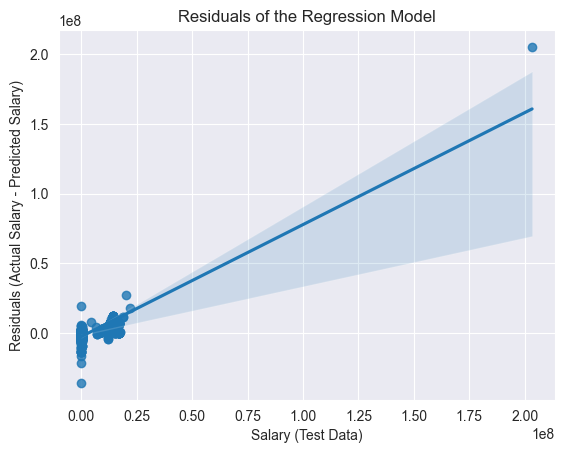

In [69]:
# Plot residuals
fm_residuals = y_test - y_predicted
sns.regplot(x=y_test, y=fm_residuals)
plt.xlabel('Salary (Test Data)')
plt.ylabel('Residuals (Actual Salary - Predicted Salary)')
plt.title('Residuals of the Regression Model')

In [70]:
print(f'The validation RMSE for this model with '
      f'alpha={round(float(model.alpha_), 2)} is '
      f'{round(get_rmse(y_test, y_predicted), 2)}.')

The validation RMSE for this model with alpha=200.0 is 8763698.39.
